<a href="https://colab.research.google.com/github/CrnTarim/simpe_matplotlib_Work/blob/main/EV_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello, in this example we will analyze the csv table showing the population of electric vehicles by district, city and year in America.

# Adding Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Connecting Drive for CSV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the directory where your files are located
directory =  "/content/drive/My Drive/Colab Notebooks/your_file_path/"

# Upload files
df = pd.read_csv(directory + 'Electric_Vehicle_Population_Data.csv')

Mounted at /content/drive


#Checking Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


We drop the columns that are not important for our work in the table and simplify the table.

In [5]:
df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)

In [6]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,King,Seattle,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,POINT (-122.30839 47.610365)
1,Snohomish,Bothell,WA,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,POINT (-122.179458 47.802589)
2,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,POINT (-122.34848 47.632405)
3,King,Issaquah,WA,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,POINT (-122.03646 47.534065)
4,Kitsap,Suquamish,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,POINT (-122.55717 47.733415)


In [7]:
df.shape

(177866, 10)

In [8]:
df.isna().sum()

County                                               5
City                                                 5
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Vehicle Location                                     9
dtype: int64

A very few data points are missing so we can remove them

In [9]:
df=df.dropna()

#Analyse Data

##Number of electric car usage according to counties

The value_counts() method returns a Series object, which is a one-dimensional data structure. To get a table view of the top 10 counties, you can use the to_frame() method to convert the Series to a DataFrame.

In [10]:
Counties=df["County"].value_counts().head(10) #value_counts() returns series of values
Counties

King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
Kitsap        5840
Spokane       4586
Whatcom       4253
Benton        2147
Skagit        1910
Name: County, dtype: int64

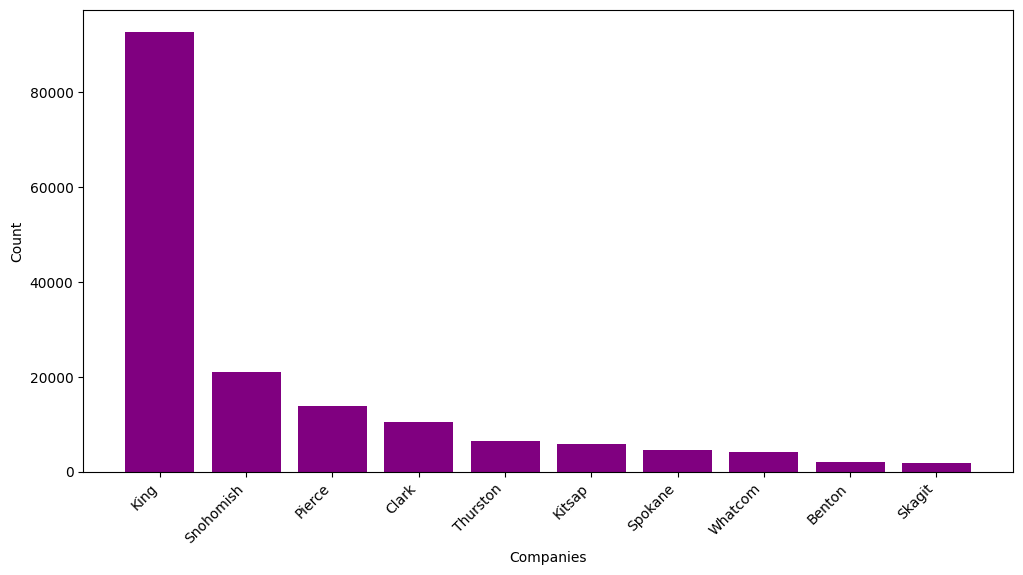

In [11]:
plt.figure(figsize=(12,6))
plt.bar(Counties.index, Counties.values, color='#800080') # x , y accepts 1 dim array so Counties=df["County"].value_counts().to_frame() doesnt necccesary

plt.xticks(rotation=45, ha='right', fontsize=10) #label rotation to fit

plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [12]:
Counties = df.groupby('County').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
Counties.head(10)


,County,Count
78,King,92740
162,Snohomish,21001
126,Pierce,13782
32,Clark,10416
175,Thurston,6428
80,Kitsap,5840
165,Spokane,4586
185,Whatcom,4253
16,Benton,2147
160,Skagit,1910


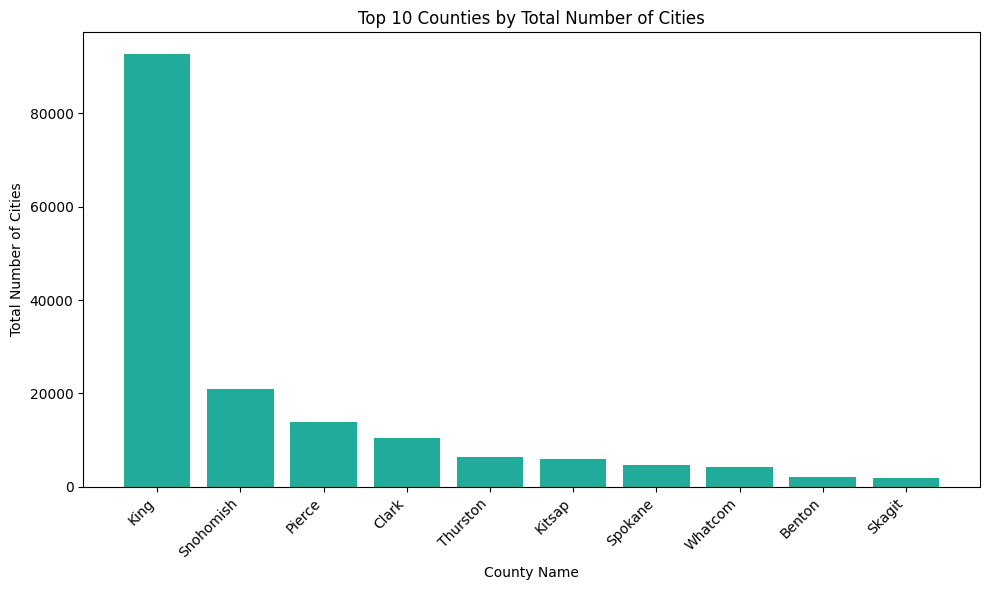

In [13]:
counties = Counties['County'].head(10)
city_counts = Counties['Count'].head(10)

plt.figure(figsize=(10, 6))
plt.bar(counties, city_counts, color='#20AB9A')
plt.xlabel('County Name')
plt.ylabel('Total Number of Cities')
plt.title('Top 10 Counties by Total Number of Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [14]:
fig = px.bar(Counties.head(10), x='County', y='Count', color='Count', labels={'County': 'County Name', 'Count': 'Total Number of Cities'})
fig.show()

##Top 10 brands in use in counties


In [15]:
company_counts = df.groupby(["Make" ,"County"]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
company_counts

,Make,County,Count
1001,TESLA,King,44894
1056,TESLA,Snohomish,10918
764,NISSAN,King,6760
1030,TESLA,Pierce,5772
153,CHEVROLET,King,5651
71,BMW,King,4476
965,TESLA,Clark,4310
312,FORD,King,3483
515,KIA,King,3362
862,RIVIAN,King,2482


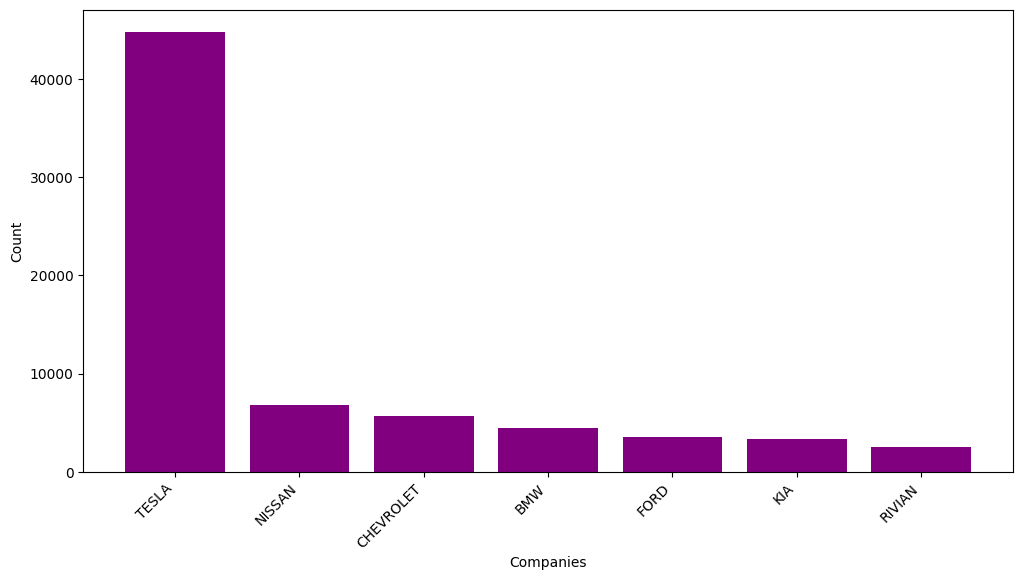

In [16]:
plt.figure(figsize=(12,6))
plt.bar(company_counts["Make"], company_counts["Count"], color='#800080')
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

##Sample queries

In [17]:
df.groupby('Make').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
#df['Make'].value_counts().head(10)

,Make,Count
34,TESLA,79655
27,NISSAN,13997
6,CHEVROLET,13677
11,FORD,9199
4,BMW,7570
18,KIA,7432
36,TOYOTA,6287
37,VOLKSWAGEN,5004
17,JEEP,4479
15,HYUNDAI,4405


In [18]:
df.groupby(["Make","City"]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
#df[['Make',"City"]].value_counts().head(10)

,Make,City,Count
5101,TESLA,Seattle,11750
4709,TESLA,Bellevue,5493
5060,TESLA,Redmond,3918
4719,TESLA,Bothell,3547
5088,TESLA,Sammamish,3353
4902,TESLA,Kirkland,2950
3913,NISSAN,Seattle,2755
5190,TESLA,Vancouver,2457
5062,TESLA,Renton,2436
910,CHEVROLET,Seattle,2280


In [19]:
df.groupby(["Make","Model","Model Year","City"]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(20)
#df[["Make","Model","Model Year","City"]].value_counts()

,Make,Model,Model Year,City,Count
24912,TESLA,MODEL Y,2023,Seattle,2343
24681,TESLA,MODEL Y,2023,Bellevue,1426
24688,TESLA,MODEL Y,2023,Bothell,1222
21350,TESLA,MODEL 3,2023,Seattle,1155
24324,TESLA,MODEL Y,2021,Seattle,1144
20116,TESLA,MODEL 3,2018,Seattle,1107
24891,TESLA,MODEL Y,2023,Redmond,1083
24606,TESLA,MODEL Y,2022,Seattle,1050
24908,TESLA,MODEL Y,2023,Sammamish,938
21084,TESLA,MODEL 3,2022,Seattle,752


In [20]:
df[df.Make=="TESLA"].groupby(["Make","Model","Model Year","City"]).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
#df[df.Make=="TESLA"][["Make","Model","Model Year","City"]].value_counts().head(10)


,Make,Model,Model Year,City,Count
5049,TESLA,MODEL Y,2023,Seattle,2343
4818,TESLA,MODEL Y,2023,Bellevue,1426
4825,TESLA,MODEL Y,2023,Bothell,1222
1487,TESLA,MODEL 3,2023,Seattle,1155
4461,TESLA,MODEL Y,2021,Seattle,1144
253,TESLA,MODEL 3,2018,Seattle,1107
5028,TESLA,MODEL Y,2023,Redmond,1083
4743,TESLA,MODEL Y,2022,Seattle,1050
5045,TESLA,MODEL Y,2023,Sammamish,938
1221,TESLA,MODEL 3,2022,Seattle,752


In [21]:
tesla_seattle_counts=df[(df.Make == "TESLA") & (df.City == "Seattle")][["Make","City","Model Year"]].value_counts()
tesla_seattle_counts

Make   City     Model Year
TESLA  Seattle  2023          3695
                2022          1972
                2021          1932
                2018          1333
                2020          1256
                2019           719
                2017           201
                2016           194
                2015           142
                2013            97
                2014            88
                2024            84
                2012            24
                2008             8
                2010             5
dtype: int64

## Tesla and Nissan use in Seattle acording to years

In [22]:
tesla_seattle_counts=df[(df.Make == "TESLA") & (df.City == "Seattle")].groupby(["Make","City","Model Year"]).size().reset_index(name="Count")
nissan_seattle_counts=df[(df.Make == "NISSAN") & (df.City == "Seattle")].groupby(["Make","City","Model Year"]).size().reset_index(name="Count")
nissan_seattle_counts

,Make,City,Model Year,Count
0,NISSAN,Seattle,2011,137
1,NISSAN,Seattle,2012,92
2,NISSAN,Seattle,2013,348
3,NISSAN,Seattle,2014,118
4,NISSAN,Seattle,2015,359
5,NISSAN,Seattle,2016,250
6,NISSAN,Seattle,2017,213
7,NISSAN,Seattle,2018,279
8,NISSAN,Seattle,2019,270
9,NISSAN,Seattle,2020,114


In [23]:
len(tesla_seattle_counts),len(nissan_seattle_counts)

(15, 14)

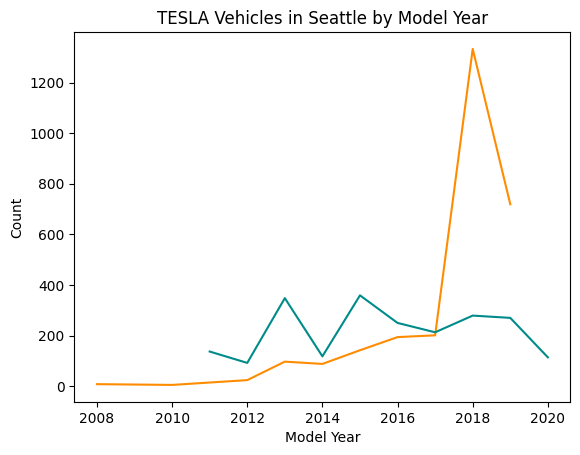

In [24]:
plt.plot(tesla_seattle_counts["Model Year"].head(10), tesla_seattle_counts["Count"].head(10),color="#FF8C00")
plt.plot(nissan_seattle_counts["Model Year"].head(10), nissan_seattle_counts["Count"].head(10),color="#008B8B")

plt.xlabel("Model Year")
plt.ylabel("Count")
plt.title("TESLA Vehicles in Seattle by Model Year")

plt.show()


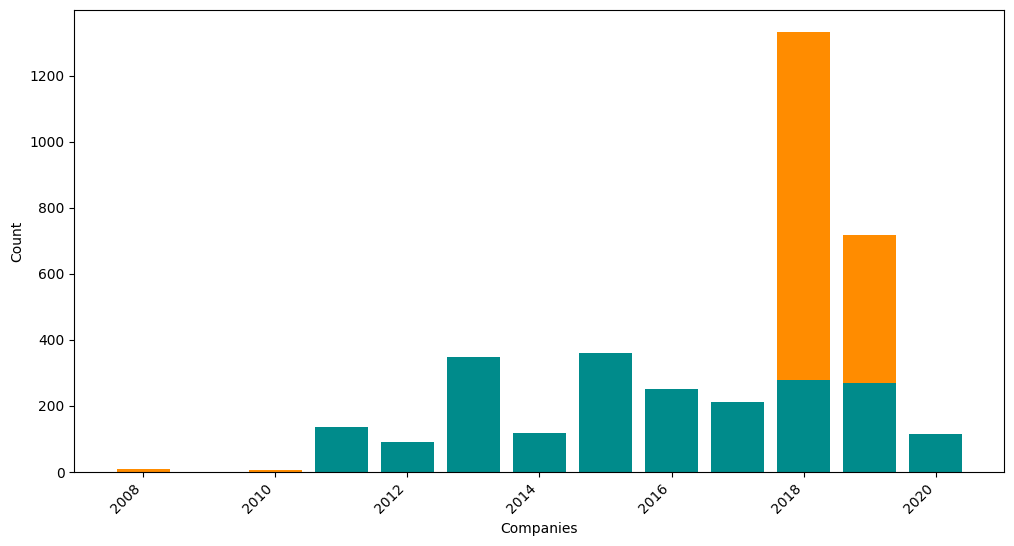

In [25]:
plt.figure(figsize=(12,6))
plt.bar(tesla_seattle_counts["Model Year"].head(10), tesla_seattle_counts["Count"].head(10), color="#FF8C00")
plt.bar(nissan_seattle_counts["Model Year"].head(10), nissan_seattle_counts["Count"].head(10), color="#008B8B")
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

## Top 10 brands in use in counties

In [26]:
company_counts=df.groupby(["Make"]).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
company_counts.head(10)

,Make,Count
34,TESLA,79655
27,NISSAN,13997
6,CHEVROLET,13677
11,FORD,9199
4,BMW,7570
18,KIA,7432
36,TOYOTA,6287
37,VOLKSWAGEN,5004
17,JEEP,4479
15,HYUNDAI,4405


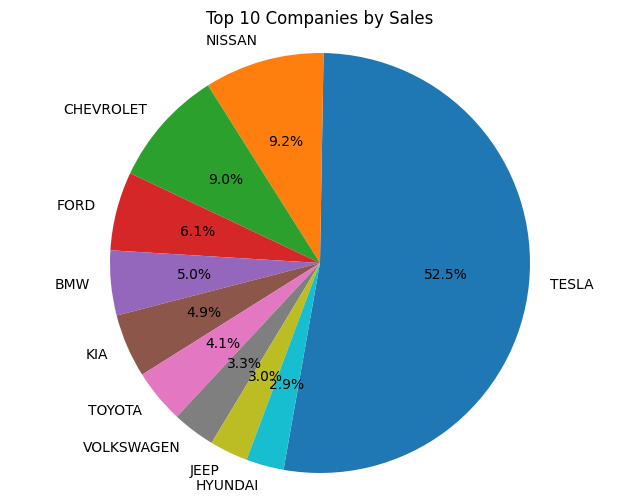

In [27]:
sales_list = company_counts["Count"].head(10)
name_list = company_counts["Make"].head(10)

plt.figure(figsize=(8, 6))
plt.pie(sales_list, labels=name_list, autopct='%1.1f%%', startangle=260)
plt.axis('equal')
plt.title('Top 10 Companies by Sales')
plt.show()

In [28]:
px.pie(names=name_list,values=sales_list,width=500,height=400)


In [29]:
df[["Make"]].head(10)

,Make
0,TESLA
1,TESLA
2,TESLA
3,TESLA
4,TESLA
5,FORD
6,NISSAN
7,KIA
8,NISSAN
9,BMW


In [30]:
df["Make"].unique()

array(['TESLA', 'FORD', 'NISSAN', 'KIA', 'BMW', 'CHEVROLET', 'AUDI',
       'SMART', 'VOLKSWAGEN', 'TOYOTA', 'RIVIAN', 'JEEP', 'HYUNDAI',
       'FIAT', 'PORSCHE', 'CHRYSLER', 'HONDA', 'MITSUBISHI', 'LEXUS',
       'VOLVO', 'DODGE', 'MERCEDES-BENZ', 'SUBARU', 'JAGUAR', 'POLESTAR',
       'MINI', 'LUCID', 'LAND ROVER', 'CADILLAC', 'ALFA ROMEO', 'FISKER',
       'MAZDA', 'LINCOLN', 'GENESIS', 'TH!NK', 'GMC', 'BENTLEY',
       'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'ROLLS ROYCE'],
      dtype=object)

In [31]:
df[df["Make"] == "BMW"].head(10)

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
9,King,Auburn,WA,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,POINT (-122.2849393 47.3384055)
11,Kitsap,Bainbridge Island,WA,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,POINT (-122.5235781 47.6293323)
21,King,Renton,WA,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,POINT (-122.15734 47.487175)
31,King,Seattle,WA,2017,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,POINT (-122.344125 47.61546)
35,King,Seattle,WA,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,POINT (-122.3185 47.67949)
41,King,Seattle,WA,2015,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,POINT (-122.30823 47.581975)
57,Snohomish,Bothell,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,POINT (-122.1873 47.820245)
69,Thurston,Olympia,WA,2021,BMW,X3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,POINT (-122.89692 47.043535)
90,Snohomish,Snohomish,WA,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,POINT (-122.15134 47.8851158)
99,Yakima,Yakima,WA,2019,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,POINT (-120.500225 46.6043)


In [32]:
top_10_companies = list(df["Make"].unique())
for i in top_10_companies:
    data = df[df['Make']==i].groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL Y
Top selling model for FORD is -----------> MUSTANG MACH-E
Top selling model for NISSAN is -----------> LEAF
Top selling model for KIA is -----------> NIRO
Top selling model for BMW is -----------> X5
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for AUDI is -----------> E-TRON
Top selling model for SMART is -----------> FORTWO ELECTRIC DRIVE
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for RIVIAN is -----------> R1S
Top selling model for JEEP is -----------> WRANGLER
Top selling model for HYUNDAI is -----------> IONIQ 5
Top selling model for FIAT is -----------> 500
Top selling model for PORSCHE is -----------> TAYCAN
Top selling model for CHRYSLER is -----------> PACIFICA
Top selling model for HONDA is -----------> CLARITY
Top selling model for MITSUBISHI is -----------> OUTLANDER
Top selling model for LEXUS is ----------->

In [33]:
Vehicle_type =df.groupby('Electric Vehicle Type').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
Vehicle_type

,Electric Vehicle Type,Count
0,Battery Electric Vehicle (BEV),139204
1,Plug-in Hybrid Electric Vehicle (PHEV),38653


In [34]:
px.pie(names=Vehicle_type["Electric Vehicle Type"],values=Vehicle_type["Count"],height=400)

In [35]:
data = df[df['Make']=="BMW"]
data.groupby(["Make",'Electric Vehicle Type']).size()

Make  Electric Vehicle Type                 
BMW   Battery Electric Vehicle (BEV)            2515
      Plug-in Hybrid Electric Vehicle (PHEV)    5055
dtype: int64

In [36]:
for index,i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

(20.0, 60.0)

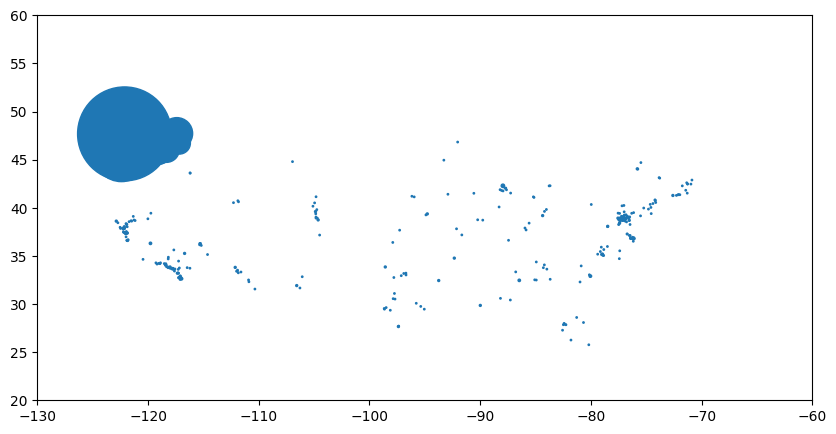

In [37]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)